In [70]:
'''
This dataset represents the data from an insaurance company which sanction loans based on various conditions.
Here we need to predict whether for a customer the company will saction loan or not.
'''

'\nThis dataset represents the data from an insaurance company which sanction loans based on various conditions.\nHere we need to predict whether for a customer the company will saction loan or not.\n'

In [71]:
#! pip install scikit-learn


In [72]:
# Importing required python libraries:
import pandas as pd

In [73]:
# Reading the data: the dataset has been uploaded to the repo. You can download it and save it in the same location as the python file.
df = pd.read_csv("loan_approval_data.csv")
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [74]:
# Describes the shape of the dataset
df.shape

(1000, 20)

In [75]:
'''
This shows from the 20 columns, have some Object: Categorical variables,
some are float type: numeric variables

So, 1st we need to convert the categorical variables to numeric variables
categorical variables --> numeric variables
'''
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [76]:
df.describe

<bound method NDFrame.describe of      Applicant_ID  Applicant_Income  Coapplicant_Income Employment_Status  \
0             1.0           17795.0              1387.0          Salaried   
1             2.0            2860.0              2679.0          Salaried   
2             3.0            7390.0              2106.0          Salaried   
3             4.0           13964.0              8173.0          Salaried   
4             5.0           13284.0              4223.0     Self-employed   
..            ...               ...                 ...               ...   
995         996.0               NaN              9092.0          Salaried   
996         997.0            3279.0              6356.0     Self-employed   
997         998.0           15192.0              8433.0          Contract   
998         999.0            9083.0              7380.0        Unemployed   
999        1000.0           13093.0              2385.0          Salaried   

      Age Marital_Status  Dependents  Cre

In [77]:
# Let's check there is any null values in the dataset or not
# So, we can see all the 20 columns are having null values: 50 null values in all the columns

df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [78]:
# Let's get the categorical variables and numeric variables:

# Let's get the categorical columns from the dataset:
cat_colmn = df.select_dtypes(include=["object"])
cat_colmn

,Employment_Status,Marital_Status,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,Salaried,Married,Personal,Urban,Not Graduate,Female,Private,No
1,Salaried,Married,Car,Semiurban,Graduate,NaN,Private,No
2,Salaried,Single,NaN,Urban,NaN,Female,Government,Yes
3,Salaried,Married,Business,Rural,Graduate,Female,Government,No
4,Self-employed,Single,Car,NaN,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...
995,Salaried,Married,Personal,NaN,Not Graduate,Male,Unemployed,No
996,Self-employed,Married,Business,Urban,Graduate,Female,Government,No
997,Contract,Single,Home,Rural,Graduate,Male,MNC,No
998,Unemployed,Single,Personal,Urban,Graduate,Male,Private,Yes


In [79]:
# Let's get the Numeric columns from the dataset:
num_colmn = df.select_dtypes(include=["float"])
num_colmn

# Now if the dataset is having more than 1 type of numeric variables (ex.: float, int, numeric etc.) -- then we can filter it out all the numeric variables
num_colmn = df.select_dtypes(include=["float", "int"])
num_colmn

# At one go, we can fetch all the numeric columns:
num_colmn = df.select_dtypes(include=["number"])
num_colmn

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
0,1.0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0
1,2.0,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN
2,3.0,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0
3,4.0,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0
4,5.0,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,NaN,9092.0,58.0,0.0,557.0,0.0,0.59,5370.0,43563.0,8311.0,72.0
996,997.0,3279.0,6356.0,58.0,1.0,646.0,3.0,0.19,NaN,18361.0,22563.0,12.0
997,998.0,15192.0,8433.0,48.0,1.0,666.0,1.0,0.40,8581.0,41335.0,16203.0,24.0
998,999.0,9083.0,7380.0,50.0,1.0,748.0,3.0,0.31,13491.0,8933.0,10290.0,36.0


In [80]:
# Categorical columns
# Get all the categorical columns and their corresponding null value count:

cat_colmn.columns

# Now replace all the null values with the most freq. values: mean value of the column

# Get the SimpleImputer Object from SKLearn

from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")

for col in cat_colmn.columns:
    print(f'column name: {col} | null value count: {df[col].isnull().sum()}')
    df[[col]] = cat_imputer.fit_transform(df[[col]])

# Post imputing there must not be any missing null values:
print("----------------------------------------"*10)

for col in cat_colmn.columns:
    print(f'column name: {col} | null value count: {df[col].isnull().sum()}')

column name: Employment_Status | null value count: 50
column name: Marital_Status | null value count: 50
column name: Loan_Purpose | null value count: 50
column name: Property_Area | null value count: 50
column name: Education_Level | null value count: 50
column name: Gender | null value count: 50
column name: Employer_Category | null value count: 50
column name: Loan_Approved | null value count: 50
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
column name: Employment_Status | null value count: 0
column name: Marital_Status | null value count: 0
column name: Loan_Purpose | null value count: 0
column name: Property_Area | null value count

In [81]:
# Numeric columns
# Get all the Numeric columns and their corresponding null value count:
# Now replace all the null values with the most freq. values: mean value of the column

# Get the SimpleImputer Object from SKLearn

from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="mean")

num_colmn.columns

for col in num_colmn.columns:
    print(f'column name: {col} | null value count: {df[col].isnull().sum()}')
    df[col] = cat_imputer.fit_transform(df[[col]]) # Filling the null values with the mean() value

# post imputing there must not be any null missing values:
print("--------************-----------"*10)
for col in num_colmn.columns:
    print(f'column name: {col} | null value count: {df[col].isnull().sum()}')

column name: Applicant_ID | null value count: 50
column name: Applicant_Income | null value count: 50
column name: Coapplicant_Income | null value count: 50
column name: Age | null value count: 50
column name: Dependents | null value count: 50
column name: Credit_Score | null value count: 50
column name: Existing_Loans | null value count: 50
column name: DTI_Ratio | null value count: 50
column name: Savings | null value count: 50
column name: Collateral_Value | null value count: 50
column name: Loan_Amount | null value count: 50
column name: Loan_Term | null value count: 50
--------************-------------------************-------------------************-------------------************-------------------************-------------------************-------------------************-------------------************-------------------************-------------------************-----------
column name: Applicant_ID | null value count: 0
column name: Applicant_Income | null value count: 0
column n

In [82]:
# So, now there must not be any null or missing values:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

In [83]:
# Now let's do EDA: Exploratory Data Analysis:
# We need to make sure, for the categorical columns the ratio between the categories must be nearly 50-50. Or else the model will be biased.

df["Loan_Approved"].value_counts()

Loan_Approved
No     702
Yes    298
Name: count, dtype: int64

In [84]:
for col in cat_colmn.columns:
    print("------*-----"*5)
    print(df[col].value_counts())

------*-----------*-----------*-----------*-----------*-----
Employment_Status
Salaried         515
Contract         213
Self-employed    182
Unemployed        90
Name: count, dtype: int64
------*-----------*-----------*-----------*-----------*-----
Marital_Status
Married    643
Single     357
Name: count, dtype: int64
------*-----------*-----------*-----------*-----------*-----
Loan_Purpose
Business     252
Car          199
Home         190
Education    181
Personal     178
Name: count, dtype: int64
------*-----------*-----------*-----------*-----------*-----
Property_Area
Urban        517
Rural        294
Semiurban    189
Name: count, dtype: int64
------*-----------*-----------*-----------*-----------*-----
Education_Level
Graduate        722
Not Graduate    278
Name: count, dtype: int64
------*-----------*-----------*-----------*-----------*-----
Gender
Male      621
Female    379
Name: count, dtype: int64
------*-----------*-----------*-----------*-----------*-----
Employer_Categor

In [85]:
! pip install matplotlib seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
df.columns

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income',
       'Employment_Status', 'Age', 'Marital_Status', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose',
       'Property_Area', 'Education_Level', 'Gender', 'Employer_Category',
       'Loan_Approved'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x11be6f78b90>,
 [Text(-0.6521425375337495, 0.8858386482531919, 'Approved'),
  Text(0.652142826176584, -0.8858384357581341, 'NA')])

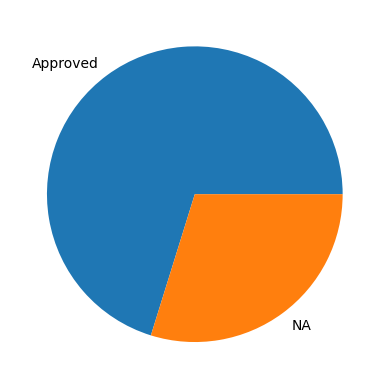

In [87]:
import matplotlib.pyplot as plt
plt.pie(df['Loan_Approved'].value_counts(), labels=['Approved', 'NA'])

<Axes: xlabel='Gender', ylabel='count'>

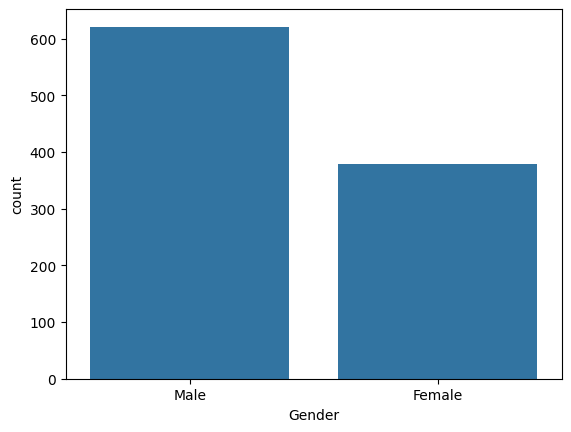

In [88]:
import seaborn as sns

sns.barplot(df["Gender"].value_counts())

<Axes: xlabel='Applicant_Income', ylabel='Count'>

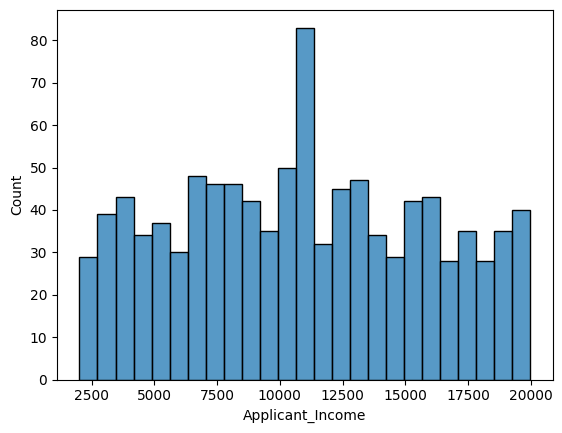

In [89]:
# Let's get the Income histogram:

sns.histplot(
    data = df,
    x = "Applicant_Income", 
    bins = 25
)

<Axes: xlabel='Loan_Approved', ylabel='Credit_Score'>

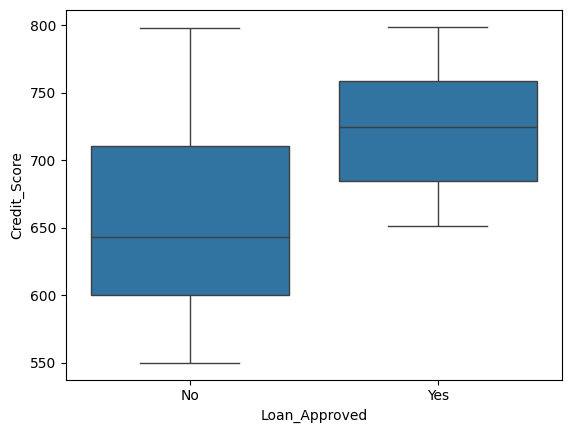

In [90]:
# Let's check if there is any outliers:
# We can see there is no outliers

sns.boxplot(
    data = df,
    x = "Loan_Approved",
    y = "Credit_Score"
)

In [91]:
# Let's drop the unnecessary column: Applicatio ID

df.drop("Applicant_ID", axis = 1)

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.000000,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.000000,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.000000,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.000000,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.000000,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.000000,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.000000,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.000000,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.000000,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.000000,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10852.571579,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.000000,43563.0,8311.0,72.0,Personal,Urban,Not Graduate,Male,Unemployed,No
996,3279.000000,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,9940.452632,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,15192.000000,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.000000,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,9083.000000,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.000000,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [92]:
# Feature Engineering:
# Convert the Categorical values --> Numeric values

'''
There is 2 types of Encoding techniques:
1. Label Encoder:: This is used for the Ordinal values: i.e. which are having in order data like: Education: School, Graduate, Post Graduate
2. OHE:: This is for Nominal values: numeric values
'''

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

df["Education_Level"] = le.fit_transform(df["Education_Level"])

In [93]:
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])

In [94]:
df[["Education_Level", "Loan_Approved"]].value_counts()

Education_Level  Loan_Approved
0                0                496
                 1                226
1                0                206
                 1                 72
Name: count, dtype: int64

In [95]:
df["Employer_Category"]

0         Private
1         Private
2      Government
3      Government
4         Private
          ...    
995    Unemployed
996    Government
997           MNC
998       Private
999       Private
Name: Employer_Category, Length: 1000, dtype: object

In [96]:
# Rest of the columns will do OHE

cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(df[cols])
encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]], shape=(1000, 15))

In [98]:
# Now convert this to encoded DataFrame

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index = df.index)

encoded_df

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [99]:
# Now we need to merge these encoded columns with the original dataset and exclude the original categorical columns

df = pd.concat([df.drop(columns=cols), encoded_df], axis = 1)

In [100]:
df

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,17795.000000,1387.0,51.0,0.0,637.0,4.0,0.53,19403.000000,45638.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,2860.000000,2679.0,46.0,3.0,621.0,2.0,0.30,2580.000000,49272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,7390.000000,2106.0,25.0,2.0,674.0,4.0,0.20,13844.000000,6908.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,13964.000000,8173.0,40.0,2.0,579.0,3.0,0.31,9553.000000,10844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,13284.000000,4223.0,31.0,2.0,721.0,1.0,0.29,9386.000000,37629.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,10852.571579,9092.0,58.0,0.0,557.0,0.0,0.59,5370.000000,43563.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
996,997.0,3279.000000,6356.0,58.0,1.0,646.0,3.0,0.19,9940.452632,18361.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,998.0,15192.000000,8433.0,48.0,1.0,666.0,1.0,0.40,8581.000000,41335.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
998,999.0,9083.000000,7380.0,50.0,1.0,748.0,3.0,0.31,13491.000000,8933.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [102]:
# Now we will be having only numeric values -- not categorical values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_ID                     1000 non-null   float64
 1   Applicant_Income                 1000 non-null   float64
 2   Coapplicant_Income               1000 non-null   float64
 3   Age                              1000 non-null   float64
 4   Dependents                       1000 non-null   float64
 5   Credit_Score                     1000 non-null   float64
 6   Existing_Loans                   1000 non-null   float64
 7   DTI_Ratio                        1000 non-null   float64
 8   Savings                          1000 non-null   float64
 9   Collateral_Value                 1000 non-null   float64
 10  Loan_Amount                      1000 non-null   float64
 11  Loan_Term                        1000 non-null   float64
 12  Education_Level      

In [103]:
# Now get the correlation Heatmap -- get the correlation between all the features
# Correlation: 
    # +1: most positive correlated
    # -1: most negative correlated
    #  0: Not related at all

num_colmn = df.select_dtypes(include="number")

In [104]:
corr_matrix = num_colmn.corr()

In [107]:
# This shows all the correlation with all the columns with all the columns --> Returns a n x n matrix 

corr_matrix

# Let's get the correlation with all the columns with the ultimate output column:
corr_matrix = num_colmn.corr()["Loan_Approved"].sort_values()

In [108]:
corr_matrix

DTI_Ratio                         -0.444783
Loan_Amount                       -0.126499
Loan_Term                         -0.086644
Loan_Purpose_Car                  -0.056416
Gender_Male                       -0.054342
Education_Level                   -0.052920
Employment_Status_Unemployed      -0.044464
Employment_Status_Salaried        -0.041428
Employer_Category_Government      -0.039187
Existing_Loans                    -0.034794
Dependents                        -0.023811
Age                               -0.022343
Employer_Category_Unemployed      -0.021468
Loan_Purpose_Education            -0.016684
Savings                           -0.013437
Property_Area_Semiurban           -0.012967
Applicant_ID                      -0.011167
Employer_Category_Private         -0.003347
Employment_Status_Self-employed   -0.001337
Loan_Purpose_Home                  0.002118
Coapplicant_Income                 0.004230
Collateral_Value                   0.021868
Property_Area_Urban             

<Axes: >

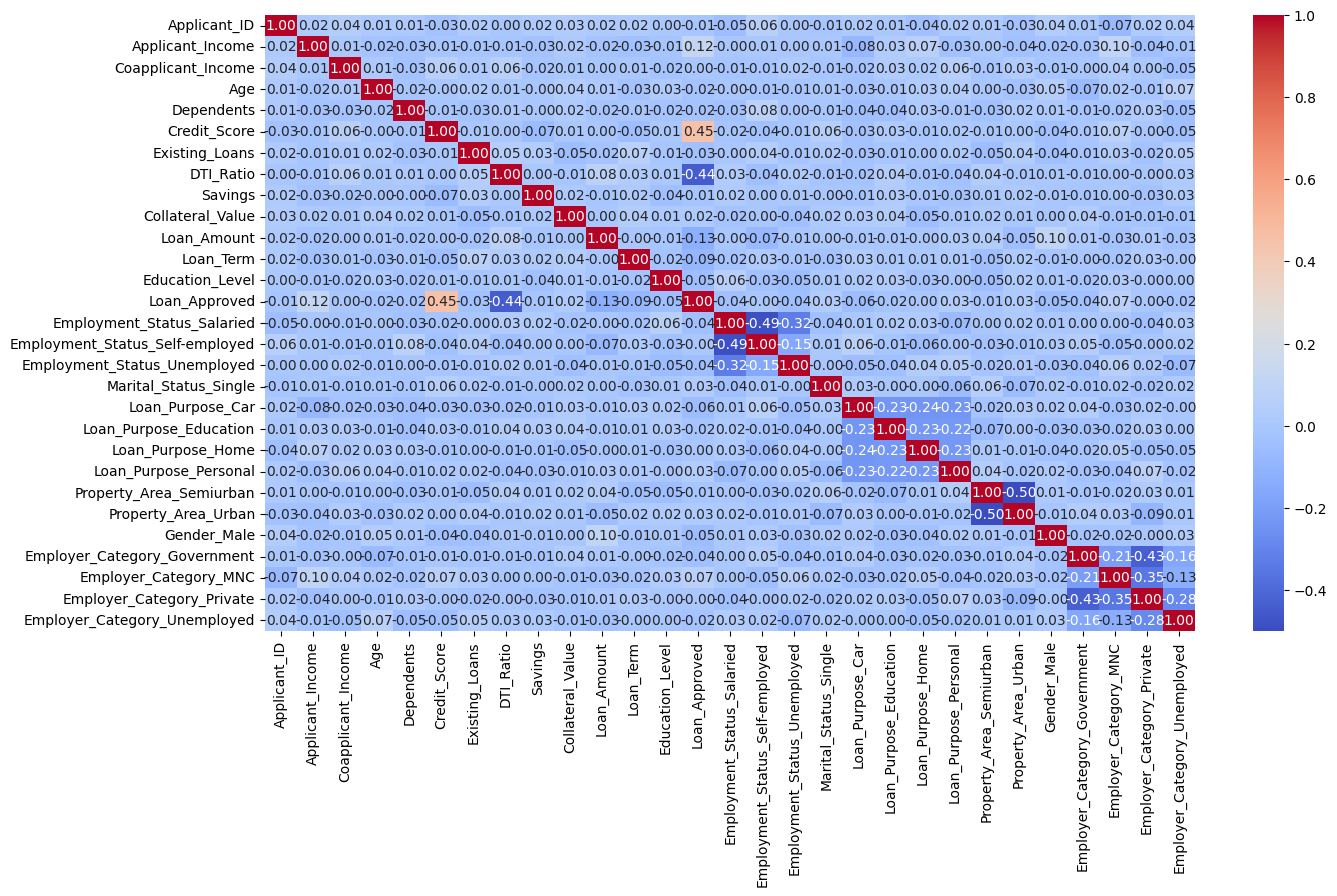

In [ ]:
# Let's plot this using heatmap:
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()

# Blue -- most neg. correlated
# Red -- Most poss. correlated


plt.figure(figsize=(15, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)


In [116]:
# Now let's get the X Y

X = df.drop("Loan_Approved", axis = 1)

In [117]:
X

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,17795.000000,1387.0,51.0,0.0,637.0,4.0,0.53,19403.000000,45638.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,2860.000000,2679.0,46.0,3.0,621.0,2.0,0.30,2580.000000,49272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,7390.000000,2106.0,25.0,2.0,674.0,4.0,0.20,13844.000000,6908.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,13964.000000,8173.0,40.0,2.0,579.0,3.0,0.31,9553.000000,10844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,13284.000000,4223.0,31.0,2.0,721.0,1.0,0.29,9386.000000,37629.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,10852.571579,9092.0,58.0,0.0,557.0,0.0,0.59,5370.000000,43563.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
996,997.0,3279.000000,6356.0,58.0,1.0,646.0,3.0,0.19,9940.452632,18361.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,998.0,15192.000000,8433.0,48.0,1.0,666.0,1.0,0.40,8581.000000,41335.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
998,999.0,9083.000000,7380.0,50.0,1.0,748.0,3.0,0.31,13491.000000,8933.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [118]:
Y = df["Loan_Approved"]

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, shuffle=True
)


In [129]:
# Now let's do Feature Scalling
# To scale the values with in a range (-1 to 1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [130]:
X_train_scaled

array([[-1.66336551, -1.01234556,  1.02716377, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [ 0.1281584 , -1.23639141, -1.59187898, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [ 0.69464817, -0.01158625,  1.33606578, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [ 1.27884075, -0.22727759,  0.35008962, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 0.00501768,  1.12970221, -0.46470044, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-1.40490455, -1.75526629,  0.01434173, ...,  2.416114  ,
        -0.85972695, -0.30723158]], shape=(800, 28))

In [ ]:
# Naive Bayes
'''
Here, the problem st. more focuses on the High risk customers whose loans are approved...
i.e. the False Possitive error -- needs to be min.
    so, the parameter to calculate the False Pos. Error : *Precision, then Recall and combiningly F1 Score.
    So, we need mostly the Precision value of different ML models and select the ML model which gives the best Precision score.
'''

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.8035714285714286
Recall:  0.7377049180327869
F1 score:  0.7692307692307693
Accuracy:  0.865
CM:  [[128  11]
 [ 16  45]]
